In [46]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [47]:
#Read CSV training data
data = pd.read_csv('mnist_train.csv')

data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
#Transform into Numpy array
data = np.array(data)

#Get rows and columns of data training data
m , n = data.shape

#Shuffle it to avoid overfitting
np.random.shuffle(data)

print(data.shape)


(60000, 785)


In [49]:
#Get data dev and data train, and put examples in columns instead of rows
data_dev = data[0:1000].T
data_train = data[1000:].T

#Labels in first row and pixels in following rows
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255


Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255


In [50]:
def init_params():
    W1 = np.random.normal(size=(10, 784)) * np.sqrt(1./(784))
    b1 = np.random.normal(size=(10, 1)) * np.sqrt(1./10)
    W2 = np.random.normal(size=(10, 10)) * np.sqrt(1./20)
    b2 = np.random.normal(size=(10, 1)) * np.sqrt(1./(784))
    return W1, b1, W2, b2
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def ReLU_deriv(Z):
    return Z > 0

def softmax(Z):
    Z -= np.max(Z, axis=0)  # Subtract max value for numerical stability
    A = np.exp(Z) / np.sum(np.exp(Z), axis=0)
    return A

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2



In [51]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [52]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[6 6 6 ... 6 6 6] [8 2 0 ... 1 4 6]
0.09688135593220339
Iteration:  10
[6 6 6 ... 8 6 6] [8 2 0 ... 1 4 6]
0.1778813559322034
Iteration:  20
[8 6 6 ... 1 4 6] [8 2 0 ... 1 4 6]
0.3503728813559322
Iteration:  30
[8 6 6 ... 1 4 6] [8 2 0 ... 1 4 6]
0.43798305084745764
Iteration:  40
[8 6 8 ... 1 4 6] [8 2 0 ... 1 4 6]
0.5231525423728813
Iteration:  50
[8 6 0 ... 1 4 6] [8 2 0 ... 1 4 6]
0.6567457627118644
Iteration:  60
[8 2 0 ... 1 4 6] [8 2 0 ... 1 4 6]
0.7246440677966102
Iteration:  70
[8 2 0 ... 1 4 6] [8 2 0 ... 1 4 6]
0.7608135593220339
Iteration:  80
[8 2 0 ... 1 4 6] [8 2 0 ... 1 4 6]
0.7824915254237288
Iteration:  90
[8 2 0 ... 1 4 6] [8 2 0 ... 1 4 6]
0.8005254237288135
Iteration:  100
[8 2 0 ... 1 4 6] [8 2 0 ... 1 4 6]
0.8121864406779661
Iteration:  110
[8 2 0 ... 1 4 6] [8 2 0 ... 1 4 6]
0.8213389830508474
Iteration:  120
[8 2 0 ... 1 4 6] [8 2 0 ... 1 4 6]
0.8298305084745763
Iteration:  130
[8 2 0 ... 1 4 6] [8 2 0 ... 1 4 6]
0.8375254237288136
Iteration:  140

In [53]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [8]
Label:  8


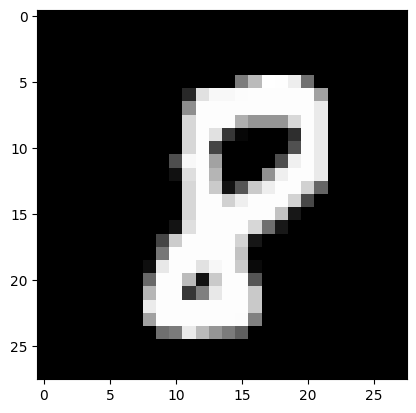

Prediction:  [2]
Label:  2


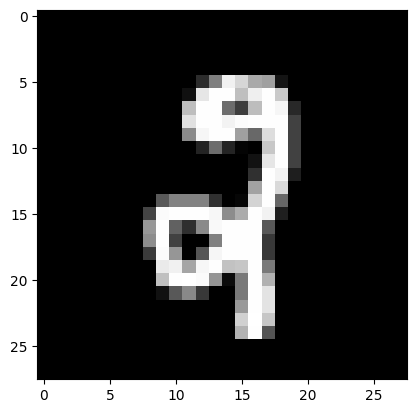

Prediction:  [0]
Label:  0


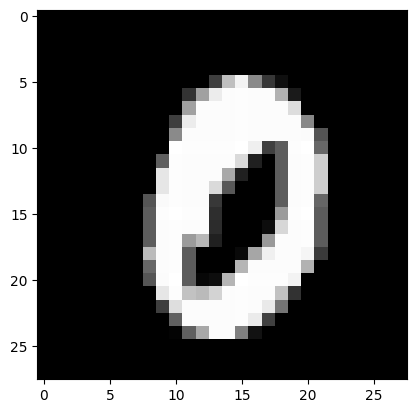

Prediction:  [2]
Label:  2


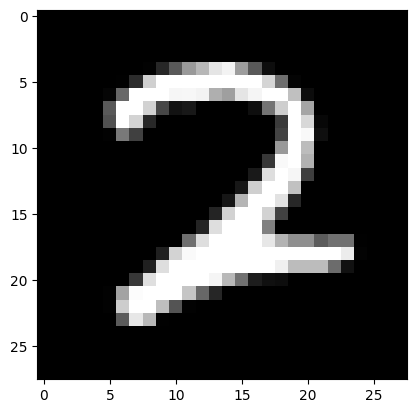

In [54]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [55]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[0 1 4 6 9 4 5 4 8 1 1 8 9 0 9 1 9 9 1 0 6 9 0 0 6 4 6 8 4 9 9 6 1 9 4 3 2
 4 4 6 7 7 0 3 4 1 3 0 9 0 5 4 1 3 9 1 9 2 6 7 2 4 4 2 0 2 9 6 0 2 2 0 5 7
 2 1 2 2 9 2 5 6 0 7 5 1 1 9 4 8 2 4 1 9 6 2 8 4 6 7 2 3 1 8 3 1 2 4 5 3 5
 8 6 1 4 2 0 4 2 3 3 7 0 5 8 3 7 3 2 7 9 0 0 3 4 5 9 9 2 0 2 0 3 4 9 0 0 0
 8 4 7 2 6 0 1 4 1 0 5 3 1 0 6 9 6 7 5 7 1 5 9 2 4 6 0 1 5 8 7 6 1 9 8 4 0
 1 8 9 4 9 3 2 5 9 5 0 7 2 4 1 4 0 7 8 0 6 3 6 6 1 4 8 7 0 6 9 5 2 3 5 9 4
 3 8 1 1 3 6 4 3 1 0 0 0 1 0 4 6 4 0 8 1 0 9 3 8 3 8 2 4 9 9 7 6 0 2 4 3 2
 3 1 4 1 1 6 9 8 9 3 9 3 0 6 7 1 2 7 7 3 4 7 1 6 7 4 1 6 3 5 4 4 5 7 0 3 8
 0 9 4 5 7 6 2 9 6 5 4 7 2 9 0 8 1 1 6 2 4 1 0 3 0 2 5 1 5 5 9 9 8 4 9 1 4
 4 9 9 0 2 9 7 0 7 4 4 8 0 7 9 4 2 8 4 1 7 1 3 6 2 0 8 5 2 9 7 6 1 8 1 8 0
 2 3 4 6 4 1 6 1 7 4 5 1 8 5 0 1 8 7 5 2 3 6 1 1 4 4 2 7 2 9 4 8 5 4 4 1 6
 1 0 9 2 7 1 1 0 9 1 5 6 5 2 9 2 1 0 6 4 9 2 2 3 8 0 2 6 7 2 3 7 5 0 6 6 5
 6 2 0 5 1 9 8 2 2 1 5 5 4 4 9 4 0 6 1 5 9 1 2 0 4 4 9 3 5 6 9 1 4 4 0 0 5
 0 8 7 2 1 4 5 2 1 5 7 2 

0.897